# Unit 5 - Financial Planning

In [147]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [148]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [149]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [150]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [151]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
my_crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your crypto is ${my_crypto_value:0.2f}")

The current value of your 1.2 BTC is $27619.20
The current value of your 5.3 ETH is $8342.57
The current value of your crypto is $35961.77


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [152]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [153]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [154]:
# Format current date as ISO format
today = pd.Timestamp('2023-01-27', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio.head()
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol',axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio.head()

AGG                                              \
                            open    high    low   close   volume trade_count   
timestamp                                                                      
2023-01-27 05:00:00+00:00  99.96  100.14  99.91  100.08  5123098       18192   

                                           SPY                          \
                                 vwap     open    high     low   close   
timestamp                                                                
2023-01-27 05:00:00+00:00  100.061411  403.655  408.16  403.44  405.68   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-01-27 05:00:00+00:00  68346180      496480  405.790293

In [155]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.08
Current SPY closing price: $405.68


In [156]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
my_shares_value = my_agg_value + my_spy_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your total shares is ${my_shares_value:0.2f}")

The current value of your 50 SPY shares is $20284.00
The current value of your 200 AGG shares is $20016.00
The current value of your total shares is $40300.00


### Savings Health Analysis

In [157]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = {'crypto': my_crypto_value, 'shares': my_shares_value}

# Create savings DataFrame
df_savings = pd.DataFrame.from_dict(savings_data, orient = 'index', columns = ['amount'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,35961.771
shares,40300.000


<AxesSubplot: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

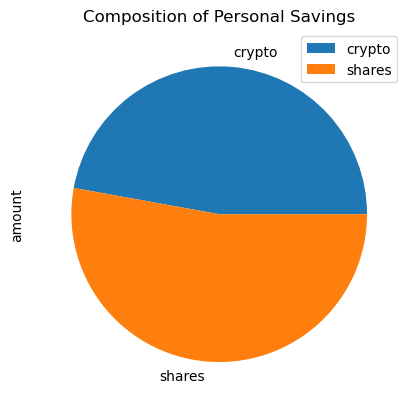

In [158]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [159]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_crypto_value + my_shares_value

# Validate saving health
if total_savings > emergency_fund:
        print(f'Congratulations! You have enough money in your emergency fund.'),
elif total_savings == emergency_fund:
        print(f'Congratulations! You have reached your savings goal.'),
else: print(f'You are ${emergency_fund - total_savings} away from your savings goal.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [162]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-27', tz='America/New_York').isoformat()

In [172]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ['SPY', 'AGG']
timeframe='1Day'
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-01-29 05:00:00+00:00  108.14  108.250  108.02  108.18   3974898   
2018-01-30 05:00:00+00:00  108.12  108.120  107.92  108.01   3659538   
2018-01-31 05:00:00+00:00  108.20  108.210  107.88  108.10   8066895   
2018-02-01 05:00:00+00:00  107.75  107.825  107.48  107.52  10330443   
2018-02-02 05:00:00+00:00  107.25  107.345  107.10  107.20   4779312   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-01-29 05:00:00+00:00       17162  108.140754  285.93  286.430  284.50   
2018-01-30 05:00:00+00:00       14454  108.010293  282.59  284.736  281.22   
2018-01-31 05:00:00+00:00       29280  108.033072  282.73  283.300  280.68   
2018-02-01 05:00:00+00:00       26477  107.695566  281.08  283.060  280.68   
2018-02-02 05:00:00+00:00       17781  107.197964  280.08  280.230  275.41   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-01-29 05:00:00+00:00  284.64   90206637      286719  285.443701  
2018-01-30 05:00:00+00:00  281.63  132075557      427207  282.425628  
2018-01-31 05:00:00+00:00  281.91  118954475      363005  281.967347  
2018-02-01 05:00:00+00:00  281.68   90622947      304909  281.766220  
2018-02-02 05:00:00+00:00  275.51  175825647      548623  277.434737

In [174]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_portfolio = MCSimulation(
    portfolio_data= df_stock_data,
    weights = [.4, .6],
    num_simulation=500,
    num_trading_days=252*30
)

In [175]:
# Printing the simulation input data
mc_portfolio.portfolio_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-01-29 05:00:00+00:00  108.14  108.250  108.02  108.18   3974898   
2018-01-30 05:00:00+00:00  108.12  108.120  107.92  108.01   3659538   
2018-01-31 05:00:00+00:00  108.20  108.210  107.88  108.10   8066895   
2018-02-01 05:00:00+00:00  107.75  107.825  107.48  107.52  10330443   
2018-02-02 05:00:00+00:00  107.25  107.345  107.10  107.20   4779312   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-01-29 05:00:00+00:00       17162  108.140754          NaN  285.93   
2018-01-30 05:00:00+00:00       14454  108.010293    -0.001571  282.59   
2018-01-31 05:00:00+00:00       29280  108.033072     0.000833  282.73   
2018-02-01 05:00:00+00:00       26477  107.695566    -0.005365  281.08   
2018-02-02 05:00:00+00:00       17781  107.197964    -0.002976  280.08   

                                                                           \
                              high     low   close     volume trade_count   
timestamp                                                                   
2018-01-29 05:00:00+00:00  286.430  284.50  284.64   90206637      286719   
2018-01-30 05:00:00+00:00  284.736  281.22  281.63  132075557      427207   
2018-01-31 05:00:00+00:00  283.300  280.68  281.91  118954475      363005   
2018-02-01 05:00:00+00:00  283.060  280.68  281.68   90622947      304909   
2018-02-02 05:00:00+00:00  280.230  275.41  275.51  175825647      548623   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-01-29 05:00:00+00:00  285.443701          NaN  
2018-01-30 05:00:00+00:00  282.425628    -0.010575  
2018-01-31 05:00:00+00:00  281.967347     0.000994  
2018-02-01 05:00:00+00:00  281.766220    -0.000816  
2018-02-02 05:00:00+00:00  277.434737    -0.021904

In [176]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 110.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 120.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 130.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 140.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 150.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 160.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 170.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 180.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 190.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 200.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 210.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 220.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 230.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 240.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 250.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 260.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 270.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 280.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 290.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 300.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 310.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 320.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 330.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 340.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 350.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 360.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 370.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 380.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 390.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 400.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 410.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 420.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 430.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 440.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 450.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 460.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 470.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 480.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 490.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014450,1.001624,1.015622,0.994114,1.012033,1.002586,0.994714,1.012771,0.994751,1.006111,...,1.006487,0.991583,1.006429,1.018035,1.003250,0.995604,1.007407,1.021033,0.999521,0.993240
2,1.015934,1.005661,1.021191,0.999067,1.003500,0.999514,0.995868,1.012290,0.987342,1.014288,...,1.003995,0.985115,1.002738,1.008145,1.004166,1.003105,1.016860,1.010793,0.989162,0.983341
3,1.008848,0.997154,1.020599,0.997980,1.008816,1.015718,0.977858,1.008156,0.978006,1.021383,...,1.003081,0.983954,0.987179,1.002352,0.991502,1.007562,1.023792,1.005923,0.998873,0.979102
4,1.002253,0.995473,1.021335,1.000268,1.018144,1.019852,0.974723,1.011407,0.979865,1.025750,...,1.006078,0.977948,1.003694,0.998457,0.982171,1.015947,1.016703,1.010614,0.997171,0.975217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.015053,3.745627,5.768275,6.599789,5.848957,5.027876,4.685160,2.973085,2.516507,4.406015,...,4.874344,8.257898,2.368654,3.089961,3.924099,4.032988,7.171890,2.740738,10.896138,2.383674
7557,1.011145,3.754898,5.664032,6.570734,5.747153,5.053301,4.654406,2.991529,2.512136,4.394562,...,4.857557,8.343255,2.367730,3.093624,3.904049,4.035299,7.180388,2.745249,10.940898,2.381480
7558,1.022124,3.726535,5.655040,6.596011,5.681839,5.033590,4.622748,3.027083,2.500348,4.435411,...,4.806523,8.485460,2.351220,3.046829,3.871555,4.034963,7.123008,2.689171,10.996783,2.370117
7559,1.027751,3.689993,5.573417,6.591846,5.664104,5.083291,4.623013,3.035619,2.487187,4.404347,...,4.771142,8.477876,2.344477,3.047551,3.876039,4.061931,7.112702,2.703271,11.042344,2.343260


<AxesSubplot: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

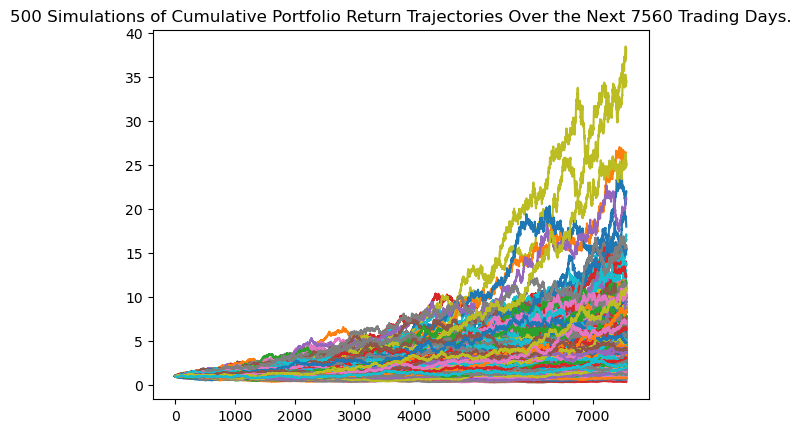

In [177]:
# Plot simulation outcomes
mc_portfolio.plot_simulation()

<AxesSubplot: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

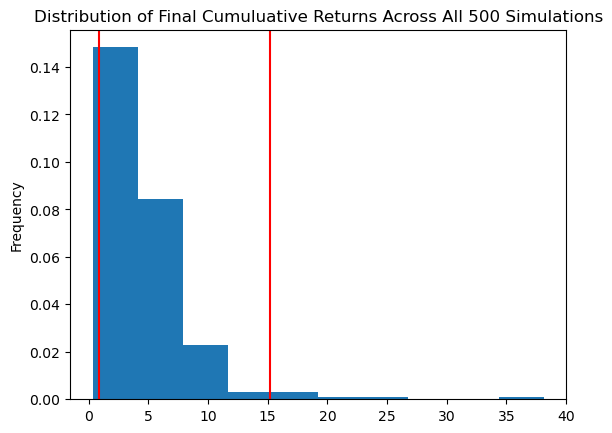

In [178]:
# Plot probability distribution and confidence intervals
mc_portfolio.plot_distribution()

### Retirement Analysis

In [180]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = mc_portfolio.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean              4.702226
std               3.996071
min               0.353900
25%               2.205631
50%               3.808340
75%               5.762173
max              38.118594
95% CI Lower      0.887586
95% CI Upper     15.156074
Name: 7560, dtype: float64


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [186]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = initial_investment * summary_stats[8]
ci_upper = initial_investment * summary_stats[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17751.718883447415 and $303121.4778885878


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [187]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * summary_stats[8]
ci_upper = initial_investment * summary_stats[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $26627.578325171125 and $454682.21683288174


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [190]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_portfolio_new = MCSimulation(
    portfolio_data= df_stock_data,
    weights = [.2, .8],
    num_simulation=500,
    num_trading_days=252*5
)

In [192]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_portfolio_new.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 110.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 120.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 130.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 140.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 150.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 160.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 170.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 180.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 190.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 200.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 210.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 220.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 230.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 240.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 250.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 260.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 270.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 280.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 290.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 300.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 310.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 320.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 330.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 340.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 350.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 360.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 370.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 380.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 390.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 400.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 410.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 420.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 430.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 440.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 450.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 460.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 470.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 480.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 490.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989333,1.005553,0.996041,1.006724,0.999361,1.009232,0.998082,1.014022,0.982665,1.006065,...,1.007033,0.989891,1.011260,1.003793,1.004185,1.002668,0.998507,1.023079,1.011187,0.999685
2,0.999194,1.030226,1.006126,1.005896,1.002087,1.014910,0.994121,1.026655,0.978500,0.991663,...,0.991127,0.983844,1.003819,1.002402,1.003128,1.001667,1.000047,1.001486,1.005026,0.989005
3,0.992031,1.037293,0.988388,1.014652,0.987270,1.018762,0.994990,1.038044,0.975542,0.975712,...,0.986729,0.989274,1.008673,1.007803,1.011527,1.002291,0.976962,1.015347,1.007097,0.983852
4,0.984876,1.025768,0.987756,1.023077,0.972555,1.015042,0.969771,1.044542,0.967052,0.982204,...,0.992252,0.993621,1.001926,1.002014,0.995771,1.008001,0.989384,1.020557,1.010588,0.996684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.167784,1.370151,1.228187,2.084408,1.602622,1.316525,0.684282,1.683087,1.674738,0.943256,...,1.475376,2.056986,2.684660,1.781054,1.147879,0.721085,0.893634,1.336627,1.205974,1.485111
1257,1.189432,1.361183,1.226426,2.093569,1.594177,1.310213,0.682017,1.690135,1.674849,0.943801,...,1.443839,2.022607,2.634632,1.757035,1.157568,0.734085,0.892762,1.345485,1.192408,1.489092
1258,1.190002,1.376233,1.220816,2.159956,1.598690,1.329782,0.685472,1.651042,1.699060,0.945344,...,1.453743,2.004459,2.628329,1.722978,1.175041,0.747692,0.899560,1.344307,1.186976,1.528329
1259,1.191713,1.388688,1.214336,2.150389,1.592329,1.307631,0.682297,1.690053,1.699826,0.955971,...,1.438377,2.023255,2.652951,1.734245,1.184116,0.744070,0.895616,1.351071,1.189773,1.540508


<AxesSubplot: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

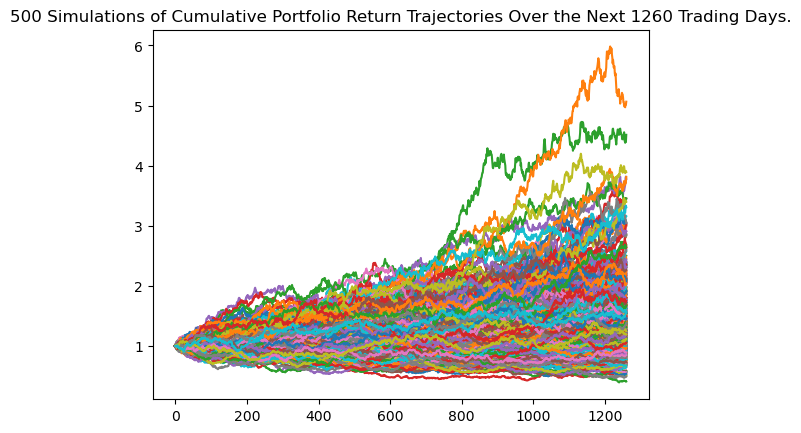

In [195]:
# Plot simulation outcomes
mc_portfolio_new.plot_simulation()

<AxesSubplot: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

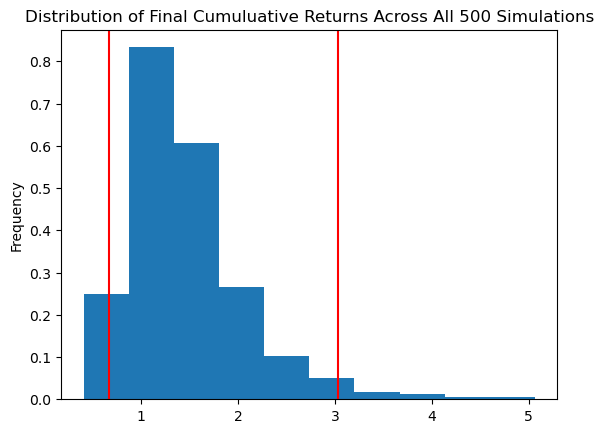

In [196]:
# Plot probability distribution and confidence intervals
mc_portfolio_new.plot_distribution()

In [198]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = mc_portfolio_new.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean              1.465472
std               0.609986
min               0.407849
25%               1.076677
50%               1.336411
75%               1.722714
max               5.064824
95% CI Lower      0.669917
95% CI Upper      3.031898
Name: 1260, dtype: float64


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [199]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = initial_investment * summary_stats[8]
ci_upper_five = initial_investment * summary_stats[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $13398.330482657611 and $60637.950841450016


Weighting the portfolio more heavily toward stocks may help the members to retire after 5 years, but it exposes them to a greater downside loss scenario which would prolong the time they need to keep working before retirement

### Ten Years Retirement Option

In [200]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_portfolio_new_10 = MCSimulation(
    portfolio_data= df_stock_data,
    weights = [.2, .8],
    num_simulation=500,
    num_trading_days=252*10
)

In [201]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_portfolio_new_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 110.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 120.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 130.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 140.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 150.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 160.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 170.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 180.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 190.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 200.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 210.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 220.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 230.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 240.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 250.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 260.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 270.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 280.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 290.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 300.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 310.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 320.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 330.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 340.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 350.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 360.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 370.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 380.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 390.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 400.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 410.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 420.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 430.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 440.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 450.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 460.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 470.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 480.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

Running Monte Carlo simulation number 490.


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.p

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996078,1.002515,0.997604,1.014379,0.989436,1.009500,0.990350,1.000782,1.016158,0.984940,...,1.005301,0.981529,0.999667,0.995331,1.008506,1.001435,0.987350,1.002571,0.994448,1.007441
2,0.996839,0.988772,1.013354,1.004211,0.985914,1.026336,0.999297,0.994493,1.031817,1.011062,...,1.006672,0.994615,0.997356,0.988562,1.014796,1.011768,0.972524,0.978594,0.982029,0.982958
3,1.005791,0.990222,1.023560,0.997258,0.989025,1.021767,1.011551,0.977391,1.052665,1.006070,...,1.011763,0.998088,0.995708,0.961223,1.003684,1.009926,0.978369,0.978285,0.979521,0.979155
4,1.021311,0.985798,1.034217,0.987883,0.977471,1.009796,1.004703,0.976155,1.062842,0.996445,...,1.005435,1.022132,0.976089,0.966220,1.002288,1.019476,0.979347,0.990821,0.980115,0.964610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.527305,1.084720,1.390243,6.446051,1.513248,0.661666,1.578471,0.855388,1.193229,2.031366,...,1.210159,3.404648,3.924736,1.835438,2.091483,3.868033,1.489557,1.503961,3.944655,1.320851
2517,3.594212,1.088830,1.372620,6.376299,1.483729,0.652521,1.582308,0.850914,1.186373,1.991548,...,1.207132,3.423664,3.916544,1.831723,2.092000,3.877206,1.490114,1.514519,3.936843,1.304994
2518,3.630970,1.094955,1.399367,6.427004,1.504342,0.649553,1.592609,0.841409,1.198827,2.002567,...,1.217104,3.450414,3.946494,1.811741,2.034670,3.898123,1.479446,1.520140,3.992664,1.298838
2519,3.600966,1.100661,1.408895,6.448280,1.496323,0.636369,1.618319,0.858971,1.163307,2.028992,...,1.226331,3.439500,3.940507,1.816331,2.059375,3.988470,1.478414,1.506336,4.010349,1.276843


<AxesSubplot: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

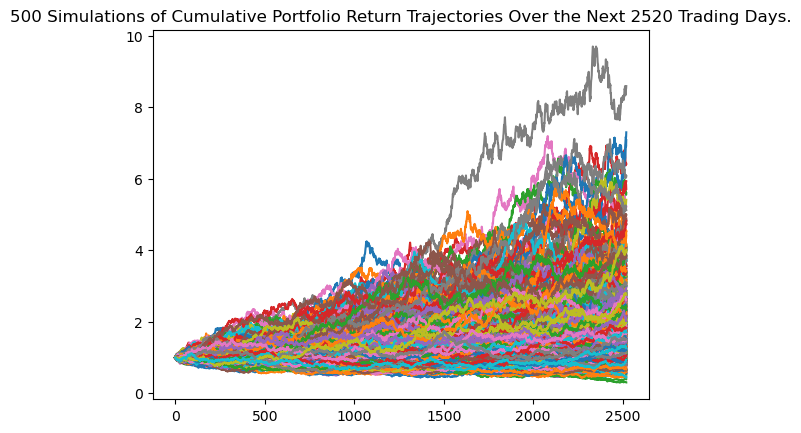

In [203]:
# Plot simulation outcomes
mc_portfolio_new_10.plot_simulation()

<AxesSubplot: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

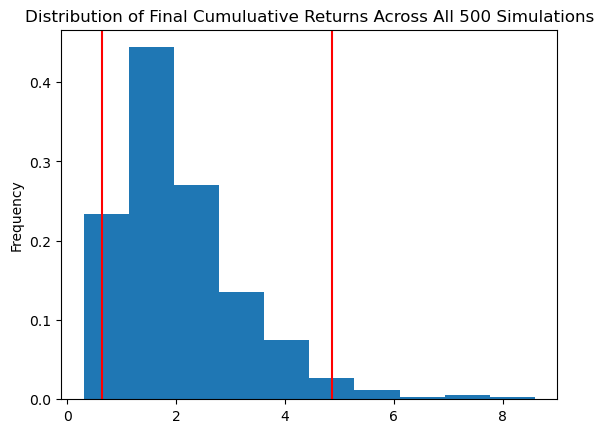

In [204]:
# Plot probability distribution and confidence intervals
mc_portfolio_new_10.plot_distribution()

In [205]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = mc_portfolio_new_10.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean              2.082406
std               1.156510
min               0.302636
25%               1.267626
50%               1.827560
75%               2.615453
max               8.593299
95% CI Lower      0.631955
95% CI Upper      4.859452
Name: 2520, dtype: float64


c:\Users\chees\Challenges\Module5_planner\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [206]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = initial_investment * summary_stats[8]
ci_upper_five = initial_investment * summary_stats[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $12639.093633013894 and $97189.04916663794


Weighting the portfolio more heavily toward stocks may help the members to retire after 10 years, but it exposes them to a greater downside loss scenario which would prolong the time they need to keep working before retirement